In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
data_path = './merged_irr_final/merged_irr_final/'
df = pd.read_csv(data_path + 'sy_merged_ndvi.csv')

In [15]:
ndvi_columns = [col for col in df.columns if 'mean ndvi' in col]
df_long = df.melt(id_vars=['group','Origin'], value_vars=ndvi_columns, var_name='date_ndvi', value_name='mean_ndvi')
# drop row with NaN values
df_long = df_long.dropna()
df_long

,group,Origin,date_ndvi,mean_ndvi
0,0,p2,12-12-22 mean ndvi,0.080648
1,0,p3,12-12-22 mean ndvi,0.085735
2,0,p1,12-12-22 mean ndvi,0.070439
3,1,p3,12-12-22 mean ndvi,0.072346
4,1,p2,12-12-22 mean ndvi,0.072396
...,...,...,...,...
59002,121,p2,07-11-22 mean ndvi,0.030335
59003,121,p1,07-11-22 mean ndvi,0.030603
59445,140,p3,27-11-22 mean ndvi,0.066974
59446,140,p2,27-11-22 mean ndvi,0.067926


In [16]:
# Remove ' mean ndvi' from date strings and convert to proper date format
df_long['date'] = df_long['date_ndvi'].str.replace(' mean ndvi', '')
df_long['date'] = pd.to_datetime(df_long['date'], format='%d-%m-%y').dt.strftime('%Y-%m-%d')
df_long.sort_values(by=['date'], inplace=True)
df_long

,group,Origin,date_ndvi,mean_ndvi,date
58571,109,p3,05-11-22 mean ndvi,0.062573,2022-11-05
58570,109,p2,05-11-22 mean ndvi,0.062089,2022-11-05
58569,109,p1,05-11-22 mean ndvi,0.063680,2022-11-05
59003,121,p1,07-11-22 mean ndvi,0.030603,2022-11-07
59002,121,p2,07-11-22 mean ndvi,0.030335,2022-11-07
...,...,...,...,...,...
23604,22,p2,04-04-23 mean ndvi,0.165291,2023-04-04
41316,77,p3,07-04-23 mean ndvi,0.146018,2023-04-07
41322,79,p2,07-04-23 mean ndvi,0.147133,2023-04-07
41323,79,p3,07-04-23 mean ndvi,0.141144,2023-04-07


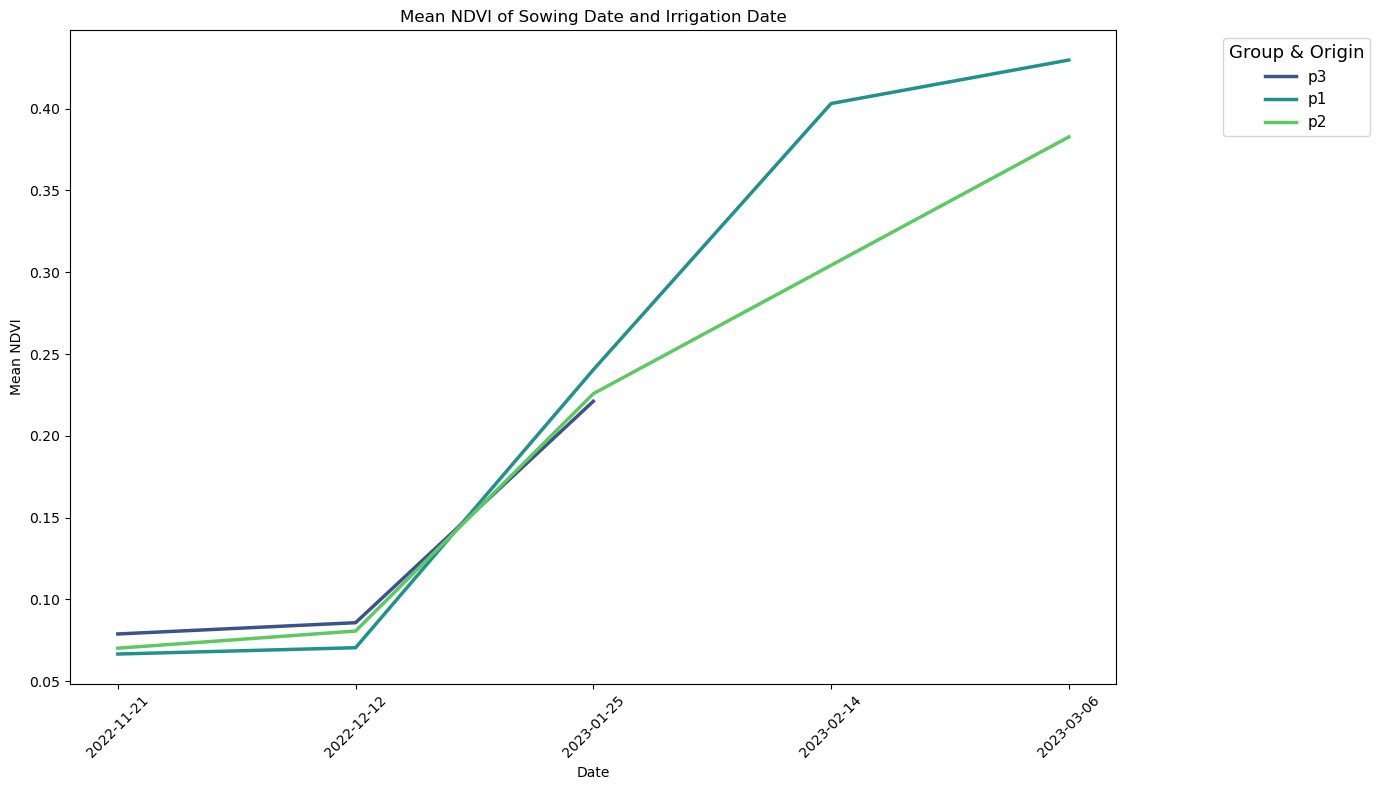

In [17]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='date', y='mean_ndvi', hue='Origin', data=df_long[df_long['group'] == 0],
             markers=True, dashes=False, palette='viridis', linewidth=2.5)

# Adding enhancements to the plot
plt.title('Mean NDVI of Sowing Date and Irrigation Date')
plt.xlabel('Date')
plt.ylabel('Mean NDVI')
plt.xticks(rotation=45)
plt.legend(title='Group & Origin', title_fontsize='13', fontsize='11', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()

# Show the plot
plt.show()

## Mean NDVI Calculation for every image between 20 days before sowing and 150 days after sowing 

In [18]:
all_ndvi = pd.read_csv(data_path + 'all_ndvi.csv')
all_ndvi

,system:index,NDVI_data,Origin,dates,end_date,group,plot1,plot2,plot3,shape_P1,shape_P2,shape_P3,sowing,sowing_dat,start_date,.geo
0,138,"[0.2596666466934959, 0.29042583381664, 0.19607...",p1,"[2022-10-24, 2022-10-29, 2022-11-03, 2022-11-1...",2023-04-08 0:00:00,108,"CT with 2 irrigations (21 DAS, 65 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","85.66504404500006 25.901887871000042, 85.66513...","85.6649886444211 25.9025527289652, 85.66489845...","85.66488403826952 25.902564189526103, 85.66478...",09-11-22,2022-11-09,2022-10-20 0:00:00,"{""type"":""Polygon"",""coordinates"":[[[85.66504331..."
1,139,"[0.26828925091290123, 0.3048756569531339, 0.20...",p3,"[2022-10-24, 2022-10-29, 2022-11-03, 2022-11-1...",2023-04-08 0:00:00,108,"CT with 2 irrigations (21 DAS, 65 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","85.66513113677502 25.902542173184425, 85.66502...","85.6649886444211 25.9025527289652, 85.66489845...","85.66488403826952 25.902564189526103, 85.66498...",09-11-22,2022-11-09,2022-10-20 0:00:00,"{""type"":""Polygon"",""coordinates"":[[[85.66478475..."
2,0000000000000000013a,"[0.2692773588613394, 0.31057569590445144, 0.20...",p2,"[2022-10-24, 2022-10-29, 2022-11-03, 2022-11-1...",2023-04-08 0:00:00,108,"CT with 2 irrigations (21 DAS, 65 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","85.66513113677502 25.902542173184425, 85.66502...","85.6649886444211 25.9025527289652, 85.66513549...","85.66488403826952 25.902564189526103, 85.66478...",09-11-22,2022-11-09,2022-10-20 0:00:00,"{""type"":""Polygon"",""coordinates"":[[[85.66513696..."
3,0000000000000000007b,"[0.1424772508754181, 0.1424772508754181, 0.142...",p1,"[2022-11-26, 2022-11-26, 2022-11-26, 2022-11-2...",2023-05-15 0:00:00,43,"CT with 2 irrigations (21 DAS, 65 DAS)","CT with 3 irrigations (21 DAS, 65 DAS, 105 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","84.2673684806919 25.25172570238767, 84.2670117...","84.26703907549381 25.251879254209708, 84.26709...","84.2667205631733 25.25192868191657, 84.2667534...",16-12-22,2022-12-16,2022-11-26 0:00:00,"{""type"":""Polygon"",""coordinates"":[[[84.26701259..."
4,0000000000000000007c,"[0.14479117254914362, 0.1447717905296223, 0.14...",p2,"[2022-11-26, 2022-11-26, 2022-11-26, 2022-11-2...",2023-05-15 0:00:00,43,"CT with 2 irrigations (21 DAS, 65 DAS)","CT with 3 irrigations (21 DAS, 65 DAS, 105 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","84.26740184426308 25.251749468478785, 84.26750...","84.26701511483954 25.251889646419496, 84.26673...","84.2667205631733 25.25192868191657, 84.2667534...",16-12-22,2022-12-16,2022-11-26 0:00:00,"{""type"":""Polygon"",""coordinates"":[[[84.26673611..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,13,"[0.1749112963220459, 0.12762616193563642, 0.09...",p2,"[2022-11-06, 2022-11-11, 2022-11-16, 2022-11-2...",2023-04-21 0:00:00,7,"CT with 4 irrigations (21 DAS, 65 DAS, 85 DAS,...","CT with 4 irrigations (21 DAS, 65 DAS, 85 DAS,...","CT with 4 irrigations (21 DAS, 65 DAS, 85 DAS,...","83.35491098463535 27.15101395766013, 83.355114...","83.35549905896187 27.150769325976377, 83.35563...","83.35460755974054 27.151070640534805, 83.35486...",22-11-22,2022-11-22,2022-11-02 0:00:00,"{""type"":""Polygon"",""coordinates"":[[[83.35549654..."
395,14,"[0.2710760547108002, 0.15659758838201346, 0.14...",p1,"[2022-11-06, 2022-11-11, 2022-11-16, 2022-11-2...",2023-04-21 0:00:00,7,"CT with 4 irrigations (21 DAS, 65 DAS, 85 DAS,...","CT with 4 irrigations (21 DAS, 65 DAS, 85 DAS,...","CT with 4 irrigations (21 DAS, 65 DAS, 85 DAS,...","83.35491098463535 27.15101395766013, 83.355114...","83.35549905896187 27.150769325976377, 83.35563...","83.35460755974054 27.151070640534805, 83.35486...",22-11-22,2022-11-22,2022-11-02 0:00:00,"{""type"":""Polygon"",""coordinates"":[[[83.35484550..."
396,18,"[0.23298466030405635, 0.13877946407228844, 0.1...",p1,"[2022-11-06, 2022-11-11

In [19]:
# Create a plot_desc column to store the irrigation description
for index, row in all_ndvi.iterrows():
    if row['Origin'] == 'p1':
        all_ndvi.loc[index, 'plot_desc'] = row['plot1']
    elif row['Origin'] == 'p2':
        all_ndvi.loc[index, 'plot_desc'] = row['plot2']
    elif row['Origin'] == 'p3':
        all_ndvi.loc[index, 'plot_desc'] = row['plot3']

all_ndvi

,system:index,NDVI_data,Origin,dates,end_date,group,plot1,plot2,plot3,shape_P1,shape_P2,shape_P3,sowing,sowing_dat,start_date,.geo,plot_desc
0,138,"[0.2596666466934959, 0.29042583381664, 0.19607...",p1,"[2022-10-24, 2022-10-29, 2022-11-03, 2022-11-1...",2023-04-08 0:00:00,108,"CT with 2 irrigations (21 DAS, 65 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","85.66504404500006 25.901887871000042, 85.66513...","85.6649886444211 25.9025527289652, 85.66489845...","85.66488403826952 25.902564189526103, 85.66478...",09-11-22,2022-11-09,2022-10-20 0:00:00,"{""type"":""Polygon"",""coordinates"":[[[85.66504331...","CT with 2 irrigations (21 DAS, 65 DAS)"
1,139,"[0.26828925091290123, 0.3048756569531339, 0.20...",p3,"[2022-10-24, 2022-10-29, 2022-11-03, 2022-11-1...",2023-04-08 0:00:00,108,"CT with 2 irrigations (21 DAS, 65 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","85.66513113677502 25.902542173184425, 85.66502...","85.6649886444211 25.9025527289652, 85.66489845...","85.66488403826952 25.902564189526103, 85.66498...",09-11-22,2022-11-09,2022-10-20 0:00:00,"{""type"":""Polygon"",""coordinates"":[[[85.66478475...","CT with 2 irrigations (21 DAS, 65 DAS)"
2,0000000000000000013a,"[0.2692773588613394, 0.31057569590445144, 0.20...",p2,"[2022-10-24, 2022-10-29, 2022-11-03, 2022-11-1...",2023-04-08 0:00:00,108,"CT with 2 irrigations (21 DAS, 65 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","85.66513113677502 25.902542173184425, 85.66502...","85.6649886444211 25.9025527289652, 85.66513549...","85.66488403826952 25.902564189526103, 85.66478...",09-11-22,2022-11-09,2022-10-20 0:00:00,"{""type"":""Polygon"",""coordinates"":[[[85.66513696...","CT with 2 irrigations (21 DAS, 65 DAS)"
3,0000000000000000007b,"[0.1424772508754181, 0.1424772508754181, 0.142...",p1,"[2022-11-26, 2022-11-26, 2022-11-26, 2022-11-2...",2023-05-15 0:00:00,43,"CT with 2 irrigations (21 DAS, 65 DAS)","CT with 3 irrigations (21 DAS, 65 DAS, 105 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","84.2673684806919 25.25172570238767, 84.2670117...","84.26703907549381 25.251879254209708, 84.26709...","84.2667205631733 25.25192868191657, 84.2667534...",16-12-22,2022-12-16,2022-11-26 0:00:00,"{""type"":""Polygon"",""coordinates"":[[[84.26701259...","CT with 2 irrigations (21 DAS, 65 DAS)"
4,0000000000000000007c,"[0.14479117254914362, 0.1447717905296223, 0.14...",p2,"[2022-11-26, 2022-11-26, 2022-11-26, 2022-11-2...",2023-05-15 0:00:00,43,"CT with 2 irrigations (21 DAS, 65 DAS)","CT with 3 irrigations (21 DAS, 65 DAS, 105 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","84.26740184426308 25.251749468478785, 84.26750...","84.26701511483954 25.251889646419496, 84.26673...","84.2667205631733 25.25192868191657, 84.2667534...",16-12-22,2022-12-16,2022-11-26 0:00:00,"{""type"":""Polygon"",""coordinates"":[[[84.26673611...","CT with 3 irrigations (21 DAS, 65 DAS, 105 DAS)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,13,"[0.1749112963220459, 0.12762616193563642, 0.09...",p2,"[2022-11-06, 2022-11-11, 2022-11-16, 2022-11-2...",2023-04-21 0:00:00,7,"CT with 4 irrigations (21 DAS, 65 DAS, 85 DAS,...","CT with 4 irrigations (21 DAS, 65 DAS, 85 DAS,...","CT with 4 irrigations (21 DAS, 65 DAS, 85 DAS,...","83.35491098463535 27.15101395766013, 83.355114...","83.35549905896187 27.150769325976377, 83.35563...","83.35460755974054 27.151070640534805, 83.35486...",22-11-22,2022-11-22,2022-11-02 0:00:00,"{""type"":""Polygon"",""coordinates"":[[[83.35549654...","CT with 4 irrigations (21 DAS, 65 DAS, 85 DAS,..."
395,14,"[0.2710760547108002, 0.15659758838201346, 0.14...",p1,"[2022-11-06, 2022-11-11, 2022-11-16, 2022-11-2...",2023-04-21 0:00:00,7,"CT with 4 irrigations (21 DAS, 65 DAS, 85 DAS,...","CT with 4 irrigations (21 DAS, 65 DAS, 85 DAS,...","CT with 4 irrigations (21 DAS, 65 DAS, 85 DAS,...","83.35491098463535 27.15101395766013, 83.355114...","83.355

In [20]:
# use group 0 as a test
group_0 = all_ndvi[all_ndvi['group'] == 0]
# first, I need to convert NDVI_data column and dates column to list, NDVI_data column is a list of NDVI values(numeric), dates column is a list of dates(date)
for i in range(len(group_0)):
    group_0['NDVI_data'].iloc[i] = group_0['NDVI_data'].iloc[i].replace('[', '').replace(']', '').split(',')
    group_0['dates'].iloc[i] = group_0['dates'].iloc[i].replace('[', '').replace(']', '').split(',')
    
# then, I need to convert NDVI_data column and dates column to numpy array
for i in range(len(group_0)):
    group_0['NDVI_data'].iloc[i] = np.array(group_0['NDVI_data'].iloc[i], dtype=float)
    group_0['dates'].iloc[i] = np.array(group_0['dates'].iloc[i], dtype='datetime64[D]')
    group_0['sowing_dat'] = np.datetime64(group_0['sowing_dat'].iloc[0])
    
group_0

C:\Users\Shaoy\AppData\Local\Temp\ipykernel_9076\4116072608.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  group_0['NDVI_data'].iloc[i] = group_0['NDVI_data'].iloc[i].replace('[', '').replace(']', '').split(',')
C:\Users\Shaoy\AppData\L

,system:index,NDVI_data,Origin,dates,end_date,group,plot1,plot2,plot3,shape_P1,shape_P2,shape_P3,sowing,sowing_dat,start_date,.geo,plot_desc
336,0,"[0.28437410177989025, 0.20175650168699188, 0.0...",p2,"[2022-11-01, 2022-11-06, 2022-11-11, 2022-11-1...",2023-04-20 0:00:00,0,"CT with 4 irrigations (21 DAS, 65 DAS, 85 DAS,...","CT with 3 irrigations (21 DAS, 65 DAS, 105 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","83.27556654810905 26.51913650693408, 83.275912...","83.275759331882 26.518783706222347, 83.2762552...","83.27629443258047 26.51849600483952, 83.276851...",21-11-22,2022-11-21,2022-11-01 0:00:00,"{""type"":""Polygon"",""coordinates"":[[[83.27556267...","CT with 3 irrigations (21 DAS, 65 DAS, 105 DAS)"
337,1,"[0.20252648990393704, 0.15894666587148837, 0.0...",p3,"[2022-11-01, 2022-11-06, 2022-11-11, 2022-11-1...",2023-04-20 0:00:00,0,"CT with 4 irrigations (21 DAS, 65 DAS, 85 DAS,...","CT with 3 irrigations (21 DAS, 65 DAS, 105 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","83.27556654810905 26.51913650693408, 83.275912...","83.275759331882 26.518783706222347, 83.2762552...","83.27629443258047 26.51849600483952, 83.276851...",21-11-22,2022-11-21,2022-11-01 0:00:00,"{""type"":""Polygon"",""coordinates"":[[[83.27613344...","CT with 2 irrigations (21 DAS, 65 DAS)"
338,2,"[0.253130282165568, 0.17553612758424988, 0.058...",p1,"[2022-11-01, 2022-11-06, 2022-11-11, 2022-11-1...",2023-04-20 0:00:00,0,"CT with 4 irrigations (21 DAS, 65 DAS, 85 DAS,...","CT with 3 irrigations (21 DAS, 65 DAS, 105 DAS)","CT with 2 irrigations (21 DAS, 65 DAS)","83.27556654810905 26.51913650693408, 83.275912...","83.275759331882 26.518783706222347, 83.2762552...","83.27629443258047 26.51849600483952, 83.276851...",21-11-22,2022-11-21,2022-11-01 0:00:00,"{""type"":""Polygon"",""coordinates"":[[[83.27546461...","CT with 4 irrigations (21 DAS, 65 DAS, 85 DAS,..."


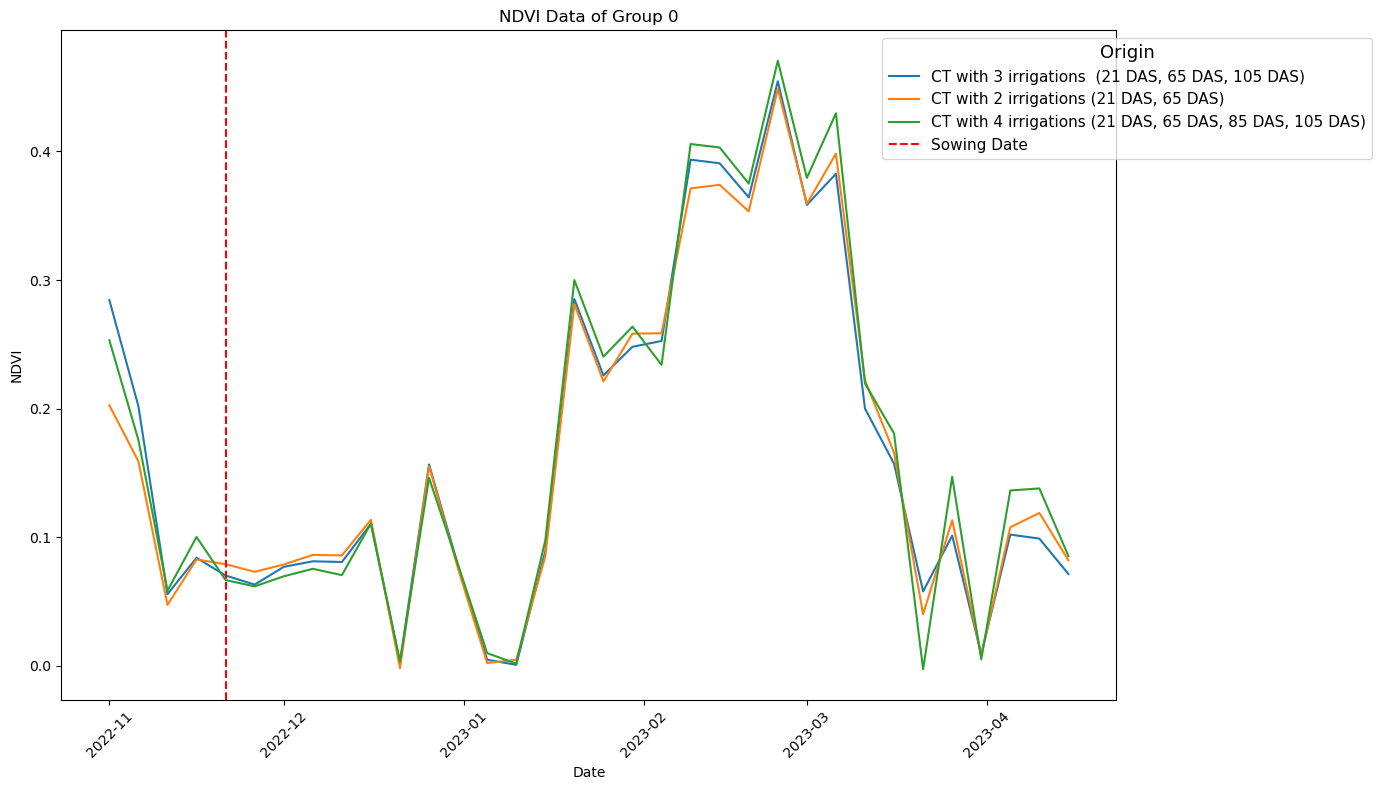

In [21]:
# draw a plot for NDVI_data
plt.figure(figsize=(14, 8))
for i in range(len(group_0)):
    plt.plot(group_0['dates'].iloc[i], group_0['NDVI_data'].iloc[i], label=group_0['plot_desc'].iloc[i])
    
# draw a vertical line to show the sowing date
plt.axvline(x=group_0['sowing_dat'].iloc[0], color='r', linestyle='--', label='Sowing Date')
    
plt.title('NDVI Data of Group 0')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.xticks(rotation=45)
plt.legend(title='Origin', title_fontsize='13', fontsize='11', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()

In [22]:
# Function to choose a group and reformat the group data
def reformat_group(group_number):
    group = all_ndvi[all_ndvi['group'] == group_number]
    for i in range(len(group)):
        group['NDVI_data'].iloc[i] = group['NDVI_data'].iloc[i].replace('[', '').replace(']', '').split(',')
        group['dates'].iloc[i] = group['dates'].iloc[i].replace('[', '').replace(']', '').split(',')
    
    for i in range(len(group)):
        group['NDVI_data'].iloc[i] = np.array(group['NDVI_data'].iloc[i], dtype=float)
        group['dates'].iloc[i] = np.array(group['dates'].iloc[i], dtype='datetime64[D]')
        group['sowing_dat'] = np.datetime64(group['sowing_dat'].iloc[0])
        
    return group

In [23]:
# Function to plot the NDVI data of a group
def plot_ndvi(group):
    plt.figure(figsize=(14, 8))
    for i in range(len(group)):
        plt.plot(group['dates'].iloc[i], group['NDVI_data'].iloc[i], label=group['plot_desc'].iloc[i])
    
    plt.axvline(x=group['sowing_dat'].iloc[0], color='r', linestyle='--', label='Sowing Date')
    plt.axvline(x=group['sowing_dat'].iloc[0] + np.timedelta64(21, 'D'), color='grey', linestyle='--', label='21 DAS')
    plt.axvline(x=group['sowing_dat'].iloc[0] + np.timedelta64(65, 'D'), color='grey', linestyle='--', label='65 DAS')
    plt.axvline(x=group['sowing_dat'].iloc[0] + np.timedelta64(85, 'D'), color='grey', linestyle='--', label='85 DAS')
    plt.axvline(x=group['sowing_dat'].iloc[0] + np.timedelta64(105, 'D'), color='grey', linestyle='--', label='105 DAS')
    
    plt.title('NDVI Data of Group ' + str(group['group'].iloc[0]))
    plt.xlabel('Date')
    plt.ylabel('NDVI')
    plt.xticks(rotation=45)
    plt.legend(title='Origin', title_fontsize='13', fontsize='11', loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.tight_layout()

C:\Users\Shaoy\AppData\Local\Temp\ipykernel_9076\2356262215.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  group['NDVI_data'].iloc[i] = group['NDVI_data'].iloc[i].replace('[', '').replace(']', '').split(',')
C:\Users\Shaoy\AppData\Local

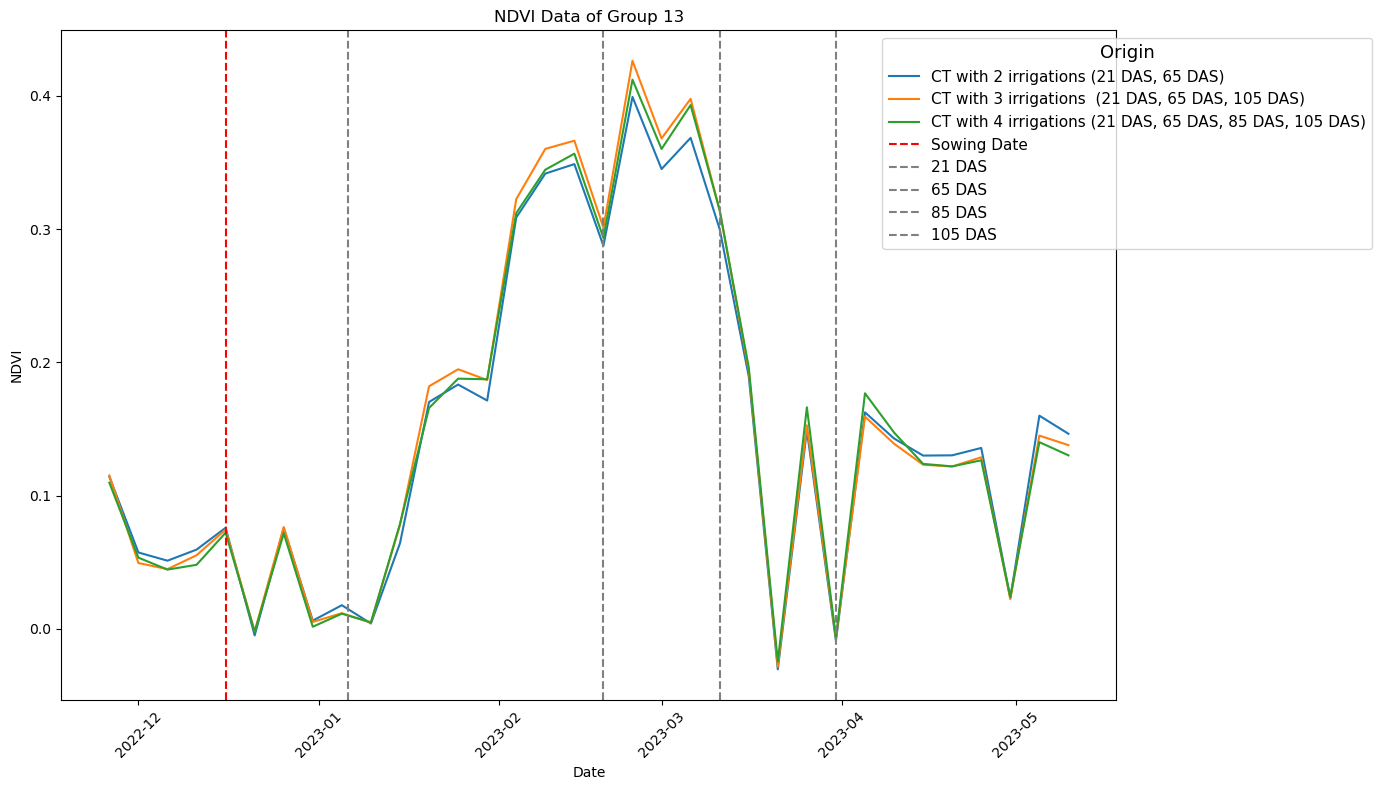

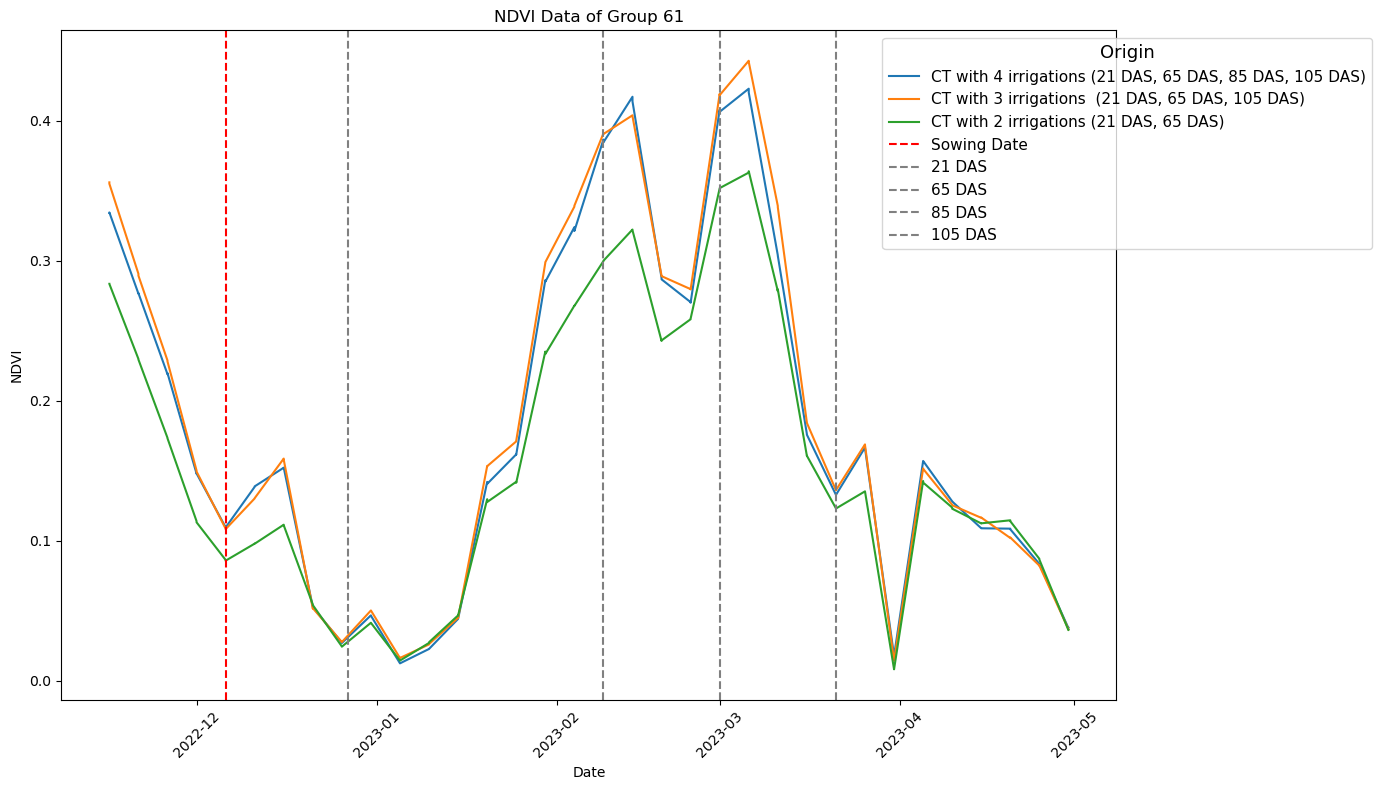

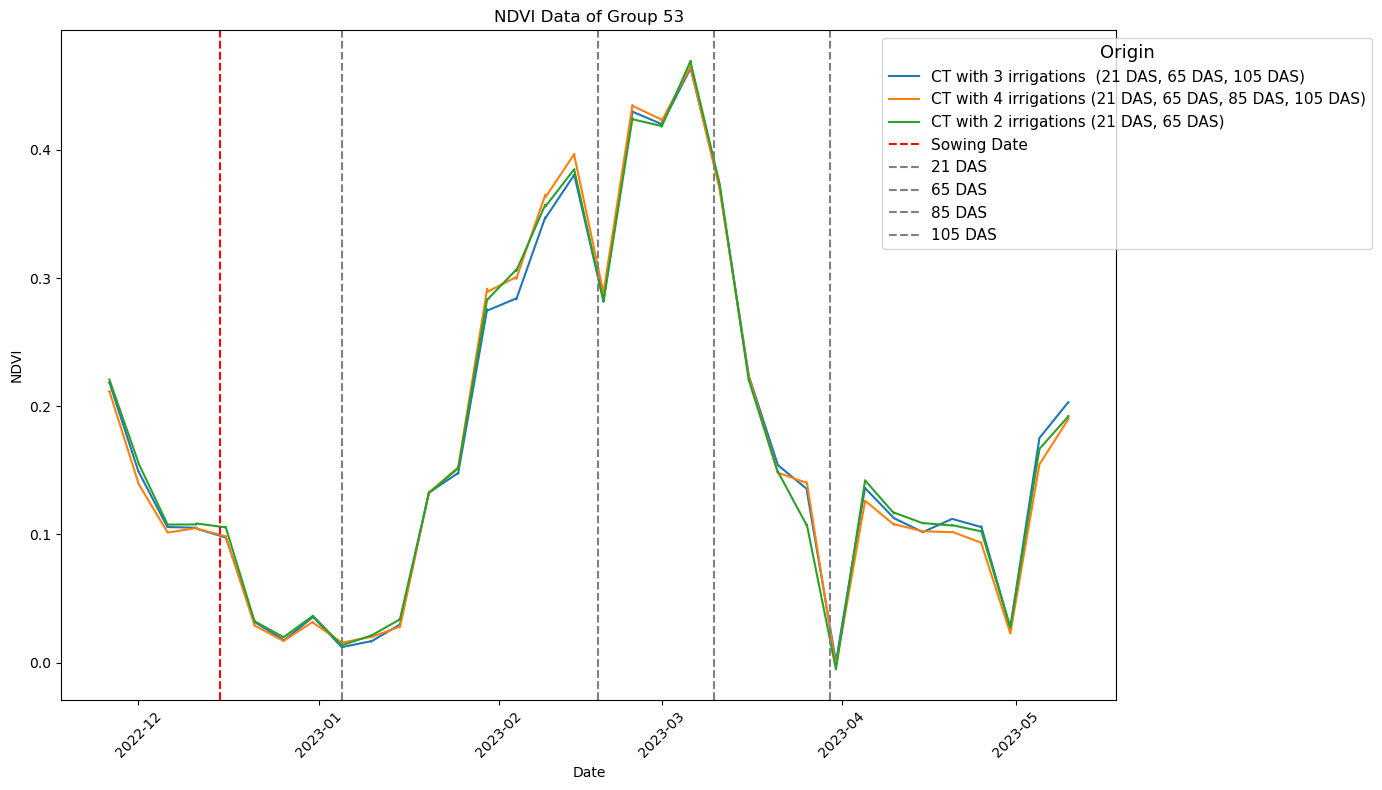

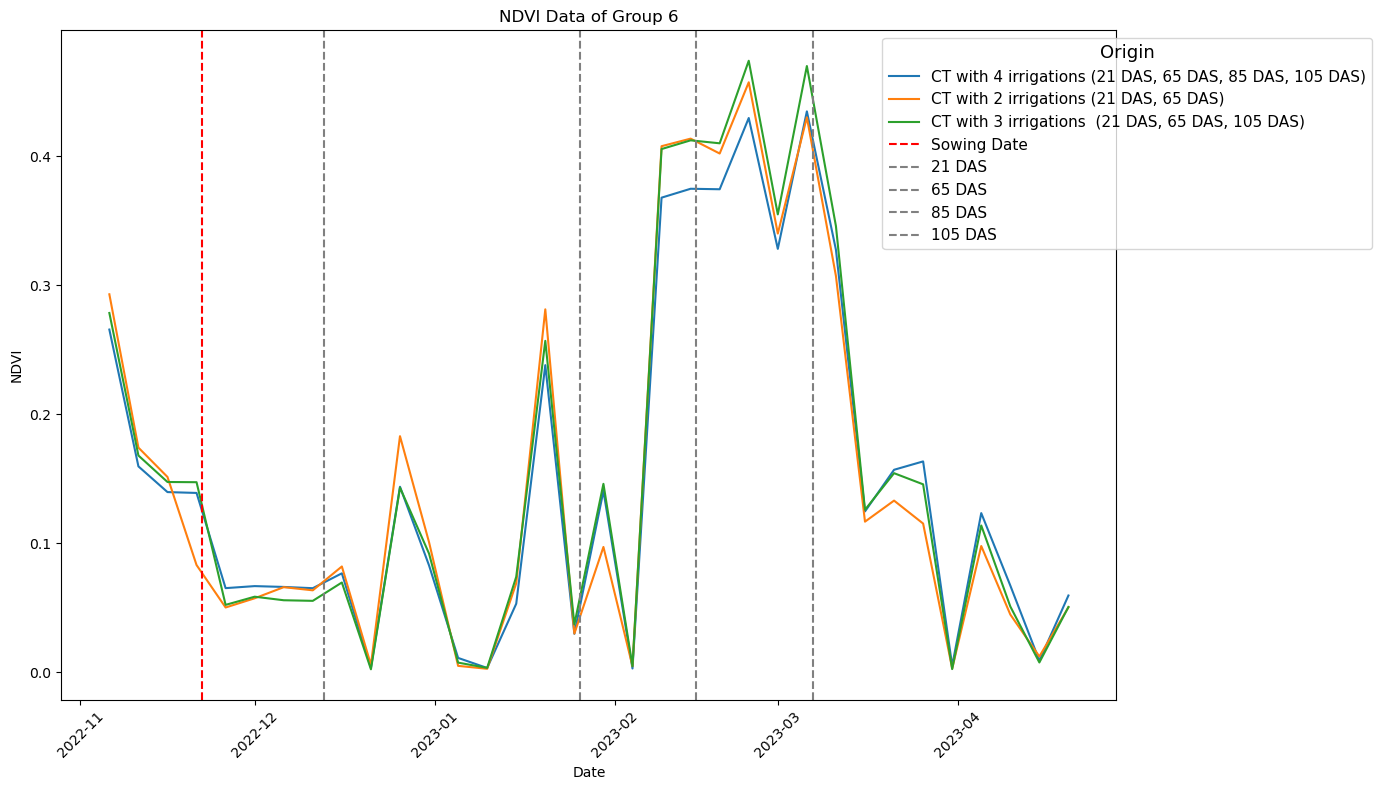

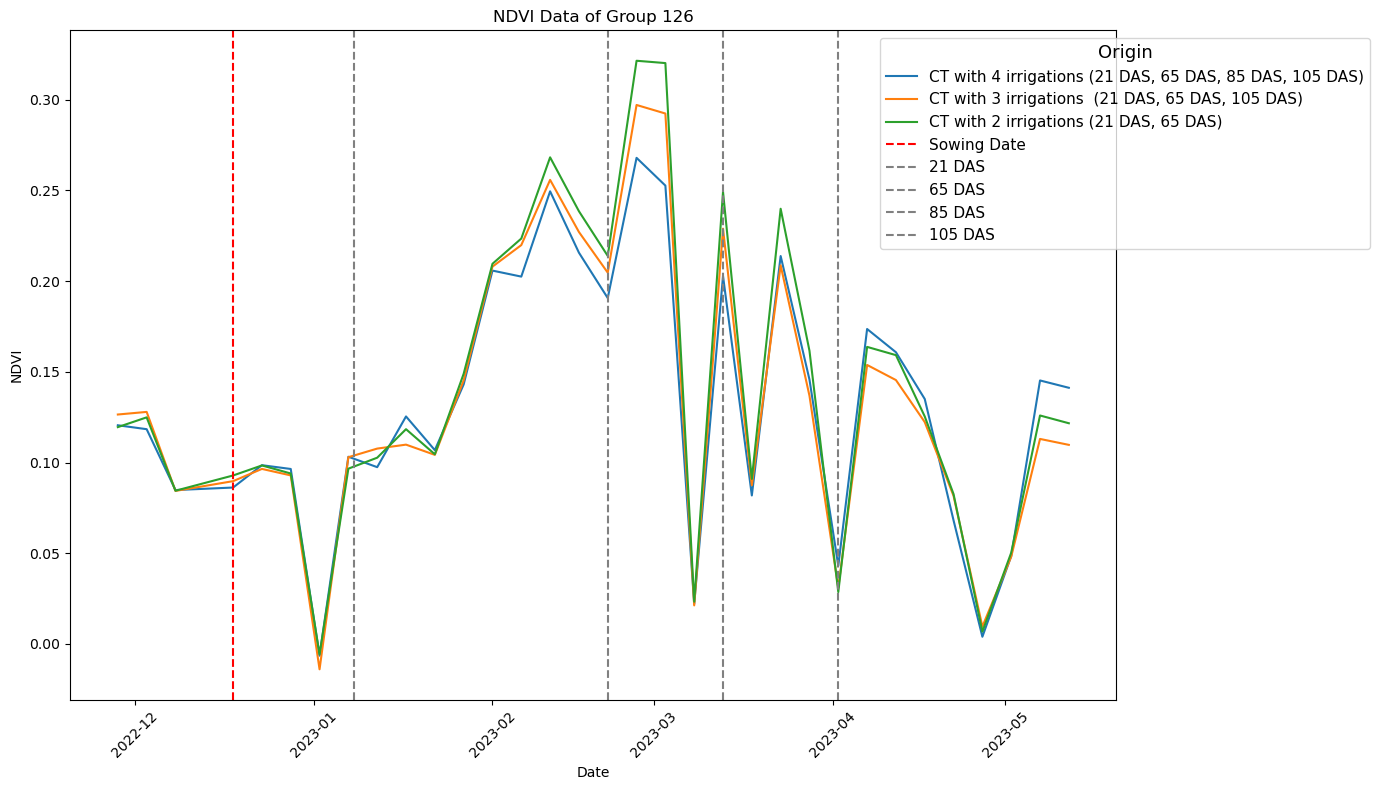

In [24]:
# Plot the NDVI data of five randomly chosen groups
groups = np.random.choice(all_ndvi['group'].unique(), 5)
for group_number in groups:
    plot_ndvi(reformat_group(group_number))

C:\Users\Shaoy\AppData\Local\Temp\ipykernel_9076\2356262215.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  group['NDVI_data'].iloc[i] = group['NDVI_data'].iloc[i].replace('[', '').replace(']', '').split(',')
C:\Users\Shaoy\AppData\Local

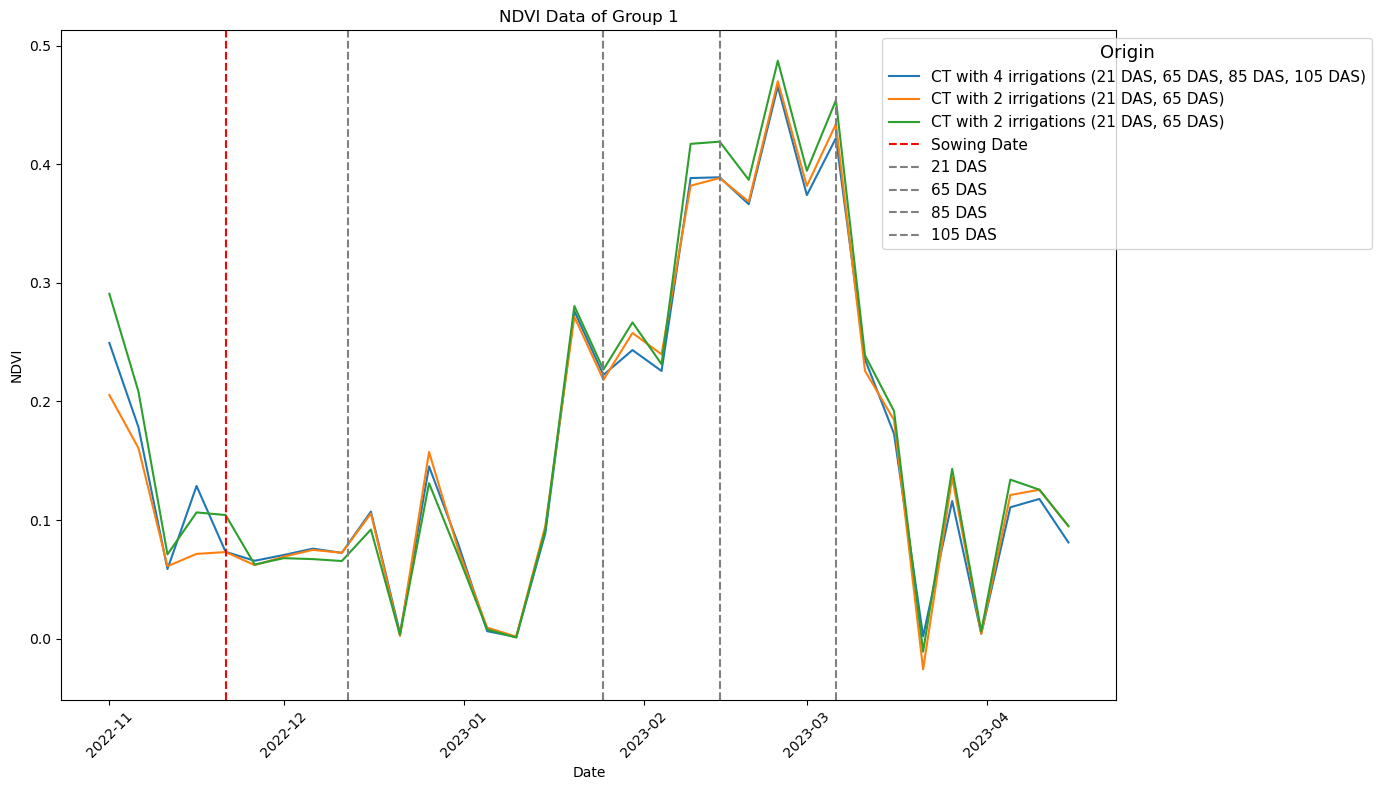

In [25]:
plot_ndvi(reformat_group(1))